# Part I - Ford GoBike System Data Project
## by Ignatius Ebigwai

## Introduction
> The dataset used in the project is a public dataset. It includes information about individual rides made
in a bike-sharing system covering the greater San Francisco Bay area. It can be found at https://www.google.com/url?q=https://www.fordgobike.com/system-data&sa=D&ust=1554484977399000 and has feature such as bike_id, start and end station, start and end station Id, start and end coordinates etc.



## Preliminary Wrangling


In [1]:
# import all packages for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopy.distance
import math
from datetime import datetime, date
%matplotlib inline

In [2]:
# reading the data into pandas and displaying the first 3 rows
bike_df = pd.read_csv(r'C:\Users\ignatius.ebigwai\Documents\Personal\Udacity\Project 3\Project Template\201902-fordgobike-tripdata.csv')
bike_df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [3]:
# dimension of the dataset
bike_df.shape

(183412, 16)

In [4]:
# structure of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# checking for total number of missing values per column in the dataset
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

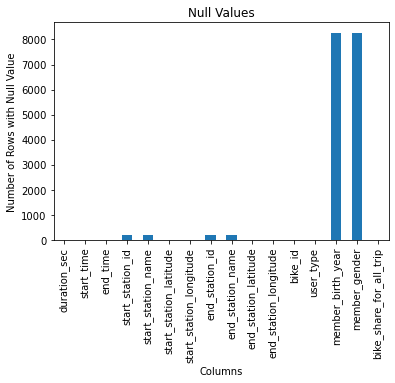

In [6]:
# plot of missing data
bike_df.isnull().sum().plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Rows with Null Value')
plt.title('Null Values');

In [7]:
# checking for duplicate records
sum(bike_df.duplicated())

0

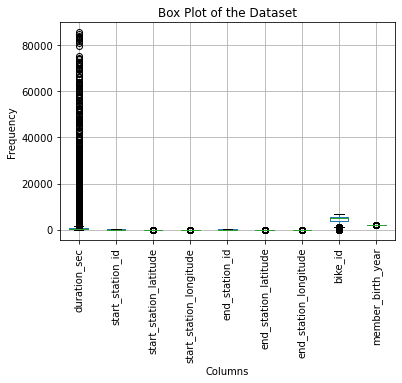

In [8]:
# boxplot
bike_df.boxplot(rot=90)
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.title('Box Plot of the Dataset');

We can see that our dataset has 183412 rows and 16 columns and missing/null values in 6 columns. Member birth year and member gender have the largeset number of missing values. The missing values are less than 5% of the records in our data set and as such can be dropped. 

There are no duplicates in the observations, hence every record is unique. Some of the column have inappropriate datatype such as start time, end time, start_station_id, end_station_id and member birth year. There are outliers in the duration_sec and bike_id columns. However it doesn't seem to be something we should worry about because the duraction of bike rides is expected to large and vary. Also the bike id is expected to vary as it could be any id the pool of registered ids 


##  Data Cleaning 

Before we start cleaning let us make a copy of the dataset

In [9]:
bike = bike_df.copy()

### Define


Let us drop rows with null values

###  Code

In [10]:
# dropping null values
bike.dropna(inplace=True)

### Test

In [11]:
# checking for null values
bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
# dimension of the data
bike.shape

(174952, 16)

### Define

Let's convert the start time and end time columns to datetime

### Code

In [13]:
# converting columns in object dtype to datetime dtype
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

### Test

In [14]:
# structure of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Define

Let us convert membership_birth_year to int and create a new column named age

### Code

In [15]:
# converting member_birth_year to int64
bike['member_birth_year'] = bike['member_birth_year'].astype(np.int64)

In [16]:
# creating a new column age
bike['age'] = 2022 - bike['member_birth_year']

# converting the age column to int64
bike['age'] = bike['age'].astype(np.int64)

### Test

In [17]:
# displaying first 2 rows
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,50


In [18]:
# structure of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Data Wrangling

### Define

Lets convert coordinates to distance and create a new column distance

### Code

In [19]:
# converting cordinates to distance in radians
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes and longitudes
    distance_Lat = (lat2 - lat1) * math.pi / 180.0
    distance_Lon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(distance_Lat / 2), 2) + pow(math.sin(distance_Lon / 2), 2) * math.cos(lat1) * math.cos(lat2));
    rad = 6371
    b = 2 * math.asin(math.sqrt(a))
    return rad * b

In [20]:
# creating  new column and converting to float
bike['distance']=bike.apply(lambda row:haversine(row['start_station_latitude'],row['start_station_longitude'],row['end_station_latitude'],row['end_station_longitude']),axis=1)
bike['distance']=bike['distance'].astype(float)

### Test

In [21]:
# displaying the first 2 rows
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,38,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,50,2.704545


In [22]:
# structure of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Define

generate days of the week

### Code

In [23]:
# generating days of the week from date
bike['start_day'] = bike['start_time'].dt.day_name()
bike['end_day'] = bike['end_time'].dt.day_name()

### Test

In [24]:
# structure of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Define

Drop some irrelevant columns

### Code

In [25]:
# dropping irrelevant column
bike_clean = bike.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'member_birth_year'], axis=1)

### Test

In [26]:
# structure of the dataset
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_gender            174952 non-null  object        
 10  bike_share_for_all_trip  174952 non-null  object        
 11  age                      174952 non-null  int64         
 12  distance        

In [27]:
# dimension of the clean dataset
bike_clean.shape

(174952, 15)

In [28]:
# saving the clean dataset
bike_clean.to_csv('bike_clean.csv', index = False)

In the codes above, I have done the following: dropped rows with null values, carried out feature engineering (created new cloumns), generated distances from the provided coordinates, convert the datatype of some columns to the appropriate datatype,  dropped irelevant columns i.e columns that are not need for our analysis and saved a copy of he dataset

Next we will be exploring the dataset

### What is the structure of your dataset?

> After cleaning the dataset is made up of 174952 rows and 15 columns 

### What is/are the main feature(s) of interest in your dataset?

> duration_sec, user_type, member_gender, bike_share_for_all_trip, age and distance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, member_birth_year, start_time end_time, start_station_id, end_station_id

## Univariate Exploration


In [29]:
# summary of data structure
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_gender            174952 non-null  object        
 10  bike_share_for_all_trip  174952 non-null  object        
 11  age                      174952 non-null  int64         
 12  distance        

### Question 1

What is the period under review

### Visualization

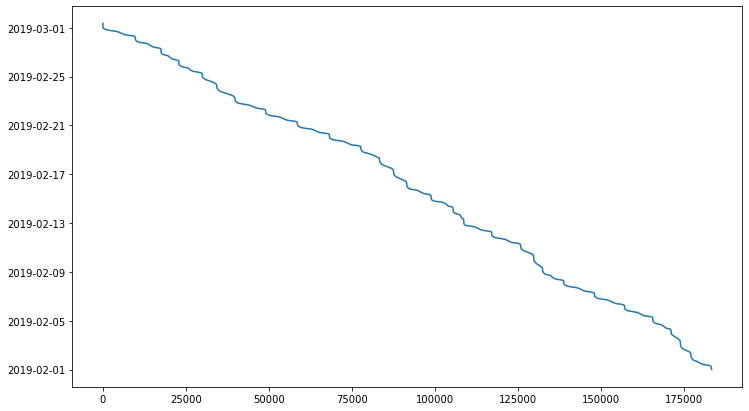

In [30]:
# line plot of the bike ride
bike_clean.end_time.plot(kind ='line', figsize=(12,7));

### Observation

The period under review is from 1st feb 2019 to 1st Mar 2019

### Question 2

Which day of the week is bike ride shared the most?

### Visualization

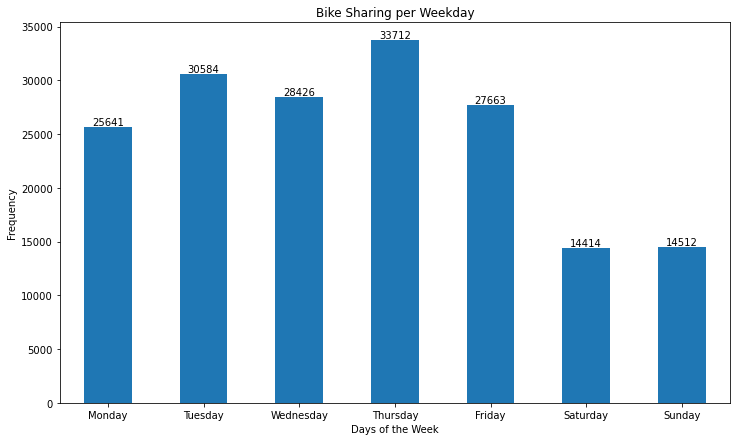

In [31]:
days_in_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# days with the most bike ride
ax = bike_clean.start_day.value_counts().reindex(days_in_order).plot(kind='bar', figsize=(12,7), rot=0)
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.title('Bike Sharing per Weekday');

for container in ax.containers:
    ax.bar_label(container)

### Observations

Displaying the frequency of daily rides shows that the day of the week bike rides were shared the most was Thursdays with over 33000 bike shared in the period under review. While the least is week end Saturdays and Sundays

### Question 3
What is the number and percentage of the user types?

### Visualization

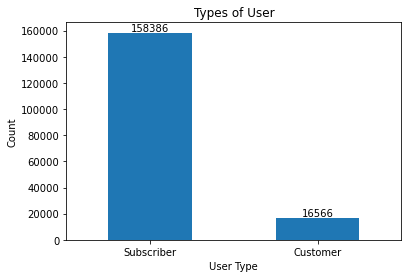

In [32]:
# plot of user type count
bx = bike_clean.user_type.value_counts().plot(kind='bar', rot=0)

plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Types of User');

for container in bx.containers:
    bx.bar_label(container)

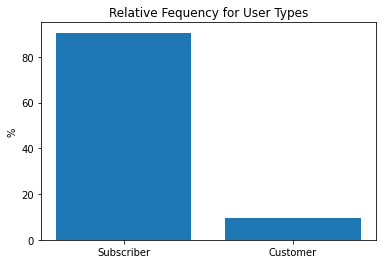

In [33]:
series = bike_clean['user_type'].value_counts() / len(bike_clean)
indx = [0,1]
plt.bar(indx, series*100)
plt.ylabel('%')
plt.title('Relative Fequency for User Types')
plt.xticks(indx, series.index);


### Observation

The subscribed users is very large (over 85%) compared with the number of customer

### Question 4
What is the number and percentage of the various gender types in the dataset?

### Visualization

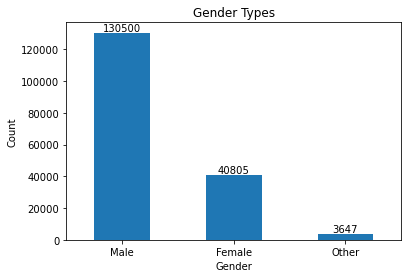

In [34]:
# displaying the genders in the dataset
cx = bike_clean.member_gender.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Types');

for container in cx.containers:
    cx.bar_label(container)

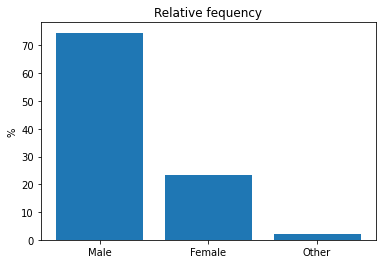

In [35]:
series = bike_clean['member_gender'].value_counts() / len(bike_clean)
indx = [0,1,2]
plt.bar(indx, series*100)
plt.ylabel('%')
plt.title('Relative fequency')
plt.xticks(indx, series.index);



### Question 5

What is the number and percentage of shared rides?

### Visualization

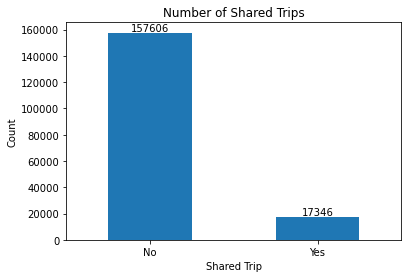

In [36]:
# displaying number of shared  trips
dx = bike_clean.bike_share_for_all_trip.value_counts().plot(kind='bar', rot=0)

plt.xlabel('Shared Trip')
plt.ylabel('Count')
plt.title('Number of Shared Trips');

for container in dx.containers:
    dx.bar_label(container)

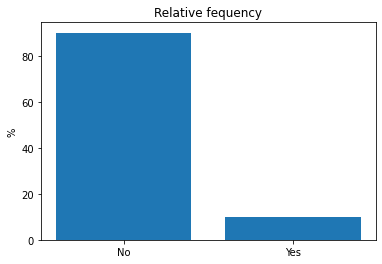

In [37]:
series = bike_clean['bike_share_for_all_trip'].value_counts() / len(bike_clean)
indx = [0,1]
plt.bar(indx, series*100)
plt.ylabel('%')
plt.title('Relative fequency')
plt.xticks(indx, series.index);

### Observation

Over 85% of trips were not shared


### Question 6
 
What is the distribution of the age?

### Visualization

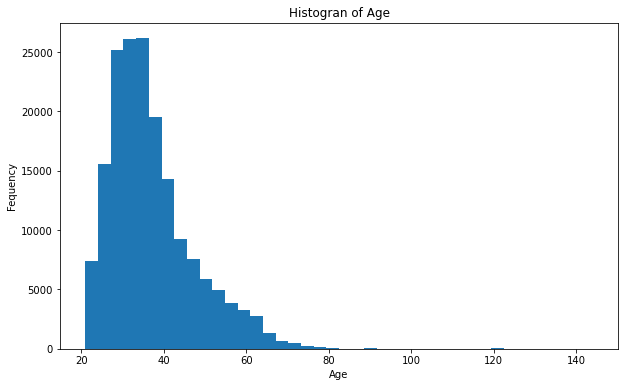

In [38]:

# histogram of the age group
plt.figure(figsize=(10,6))
plt.hist(data = bike_clean, x = 'age', bins=40);
#plt.figure(figsize=(8,8))

plt.xlabel('Age')
plt.ylabel('Fequency')
plt.title('Histogran of Age');

### Observation
Age distribution is unimodal and we see more riders within the ages of 20 and 40 with the most being between 30 and 40

### Question 7
What is the distribution of duration


### Visualization

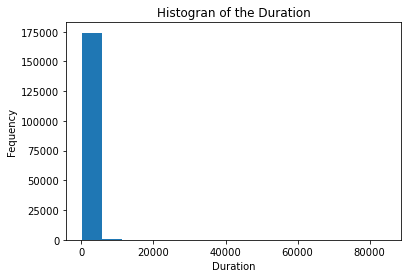

In [39]:
# histogram of the duration
# 0, 8, 80, 800, 8000, 80000
plt.hist(data = bike_clean, x = 'duration_sec', bins=15);

plt.xlabel('Duration')
plt.ylabel('Fequency')
plt.title('Histogran of the Duration');

In [40]:
# description summary of duration
bike_clean.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [41]:
# displaying duration greater than 40000 seconds
bike_clean[bike_clean['duration_sec'] >40000 ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,start_day,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,38,0.544709,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,50,2.704545,Thursday,Friday
3401,62452,2019-02-28 00:04:01.344,2019-02-28 17:24:54.137,154.0,Doyle St at 59th St,213.0,32nd St at Adeline St,4683,Subscriber,Female,No,33,2.098161,Thursday,Thursday
5203,83195,2019-02-27 14:47:23.181,2019-02-28 13:53:58.433,243.0,Bancroft Way at College Ave,248.0,Telegraph Ave at Ashby Ave,5781,Subscriber,Female,Yes,60,1.565618,Wednesday,Thursday
7268,66065,2019-02-27 15:00:20.639,2019-02-28 09:21:26.336,349.0,Howard St at Mary St,62.0,Victoria Manalo Draves Park,6107,Customer,Male,No,28,0.364225,Wednesday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165066,51574,2019-02-04 17:35:50.621,2019-02-05 07:55:25.306,115.0,Jackson Playground,47.0,4th St at Harrison St,1106,Subscriber,Male,No,51,1.773266,Monday,Tuesday
172287,47317,2019-02-03 03:35:32.413,2019-02-03 16:44:10.385,95.0,Sanchez St at 15th St,95.0,Sanchez St at 15th St,5282,Subscriber,Male,No,39,0.000000,Sunday,Sunday
174403,67512,2019-02-01 23:54:03.833,2019-02-02 18:39:16.575,19.0,Post St at Kearny St,6.0,The Embarcadero at Sansome St,2769,Subscriber,Male,No,26,1.756428,Friday,Saturday
176130,59813,2019-02-01 19:54:49.848,2019-02-02 12:31:43.043,60.0,8th St at Ringold St,43.0,San Francisco Public Library (Grove St at Hyde...,335,Subscriber,Female,No,32,0.739854,Friday,Saturday


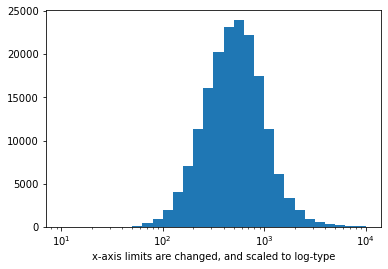

In [42]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(1, 4+0.1, 0.1)
plt.hist(data=bike_clean, x='duration_sec', bins=bins)

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-axis label
plt.xlabel('x-axis limits are changed, and scaled to log-type');

### Observation

The distribution of the duration is very skewed to the right and was transformed to ensure accurate representation of the distribution. After ransformation it has turned to a normal distribution with 75% of the duration fall

### Question 8
What is the distribution of the distance feature

### Visualization

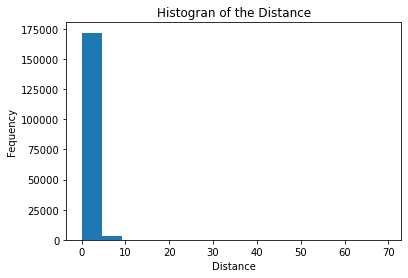

In [43]:
# histogram of the distance
plt.hist(data = bike_clean, x = 'distance', bins=15);

plt.xlabel('Distance')
plt.ylabel('Fequency')
plt.title('Histogran of the Distance');

In [44]:
# summary description of distance
bike_clean.distance.describe()

count    174952.000000
mean          1.690049
std           1.096957
min           0.000000
25%           0.910443
50%           1.429829
75%           2.224010
max          69.469241
Name: distance, dtype: float64

In [45]:
# identifying the outlier
bike_clean[bike_clean['distance'] > 16]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,start_day,end_day
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),300.0,Palm St at Willow St,4780,Subscriber,Female,No,37,69.469241,Tuesday,Tuesday


In [46]:
# dropping the outlier
bike_clean = bike_clean.drop(index=112038)

## Test

In [47]:
# summary description of distance
bike_clean.distance.describe() 

count    174951.000000
mean          1.689662
std           1.084925
min           0.000000
25%           0.910423
50%           1.429829
75%           2.224010
max          15.673955
Name: distance, dtype: float64

<AxesSubplot:>

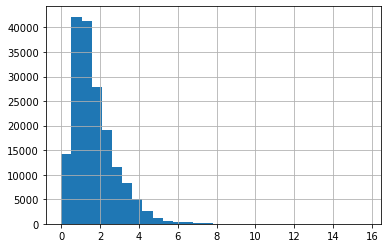

In [48]:
# summary description of distance
bike_clean.distance.hist(bins = 30)

### Observation
Distance contained an outlier and it was dropped so as to give a true picture of the distribution. Most of the trip time fall between 0 and 3 rads

In [49]:
# dimension of dataset
bike_clean.shape

(174951, 15)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The age distribution is right skewed. However i could still make out some information from the distribution. 
Duration feature shows a very skewed distribution. Upon investigation a lot of data point lie in the right tail and as such it needed to be transformed inorder not to lose data and have a true distribution representation. Distance also was skewwed to the right but this was observed to contain an outlier. After dropping the outlier the data showed a near normal distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the codes above, I have done the following: dropped rows with null values, carried out feature engineering (created new cloumns), generated distances from the provided coordinates, convert the datatype of some columns to the appropriate datatype,  dropped irelevant columns i.e columns that are not need for our analysis and saved a copy of he dataset

> Next we will be exploring the dataset

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [50]:
# sructure of the data
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174951 non-null  int64         
 1   start_time               174951 non-null  datetime64[ns]
 2   end_time                 174951 non-null  datetime64[ns]
 3   start_station_id         174951 non-null  float64       
 4   start_station_name       174951 non-null  object        
 5   end_station_id           174951 non-null  float64       
 6   end_station_name         174951 non-null  object        
 7   bike_id                  174951 non-null  int64         
 8   user_type                174951 non-null  object        
 9   member_gender            174951 non-null  object        
 10  bike_share_for_all_trip  174951 non-null  object        
 11  age                      174951 non-null  int64         
 12  distance        

In [51]:
# count of individual age
bike_clean.age.value_counts()

34     10214
29      9323
33      8967
32      8640
31      8484
       ...  
94         1
144        1
92         1
112        1
95         1
Name: age, Length: 75, dtype: int64

In [52]:
# identifying the outlier in the distance column
# bike_clean[bike_clean['distance'] == 69.4692406820139 ]


In [53]:
# dropping the outlier in the distance column
# bike_clean.drop(112038, inplace=True)

### Question 9


What is the relationship between the pair of categorical and numeric variables - 
> duration_sec & member_gender

### Visualization

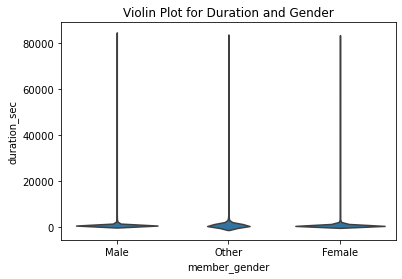

In [54]:
# Violin Plot for Duration and Gender
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='member_gender', y='duration_sec', color=base_color, inner=None);

plt.title('Violin Plot for Duration and Gender');

### Observation

This is a non-monotonic relationship between duration and gender. However the distribution of male and female are more peak and wider than other. Both variables suggest the presence of outliers indicating greater time were covered by all gender




### Question 10

What is the relationship between Age and Gender

### Visualization

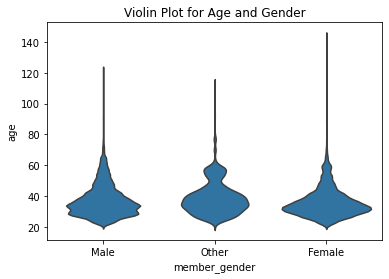

In [55]:
# Violin Plot for Duration and Gender
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='member_gender', y='age', color=base_color, inner=None);

plt.title('Violin Plot for Age and Gender');

### Observation

Same non-monotonic relationship with the Females with who are of younger age compared with Male and Other genders. The other are older compared with the Males. The distribution of the female is more peak and the Male seem to have dual peaks


### Question 11

What is the relationship between gender and distance


### Visualization

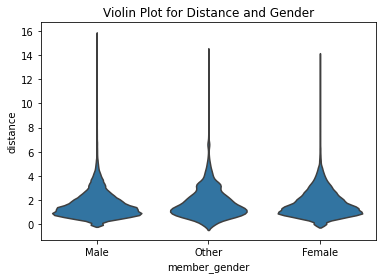

In [56]:
# violin plot for distance and gender
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='member_gender', y='distance', color=base_color, inner=None);

plt.title('Violin Plot for Distance and Gender');

### Observation

> From the plot the distribution of the male is more peak and the distances covered seem to be thesame aside ffrom the outliers in the females.

### Question 12

> What is the relationship between distance and trip sharing

### Visualization

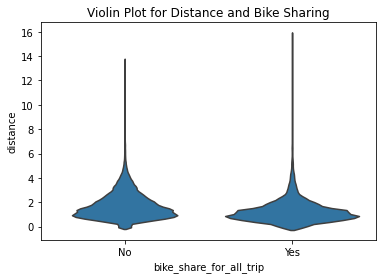

In [57]:
# violin plot for distance and bike sharing
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='bike_share_for_all_trip', y='distance', color=base_color, inner=None)

plt.title('Violin Plot for Distance and Bike Sharing');

### Observation

> The distribution of those that shared their ride is more peak and we can infer that people who did not share their rides travelled far greater distances that the people who shared their ride. The long tail of No suggest outliers

### Question 13

What is the relationship between people who shared their rides and age

### Visualization

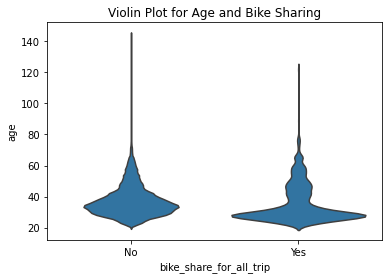

In [58]:
# violin plot for age and bike sharing
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='bike_share_for_all_trip', y='age', color=base_color, inner=None);

plt.title('Violin Plot for Age and Bike Sharing');

### Observation

The people who did not share their rides are younger compared with those who didn't. More so those those who didn't, are older with the peak of the distribution above the distribution of 'Yes'


### Question 14

What is the relationship between the distance and user type

### Visualization

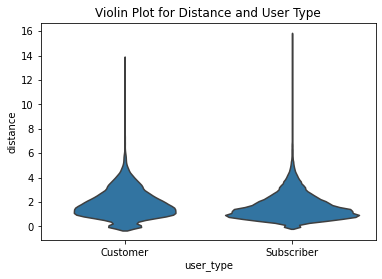

In [59]:
# violin plo for distance and user type
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='user_type', y='distance', color=base_color, inner=None);

plt.title('Violin Plot for Distance and User Type');

### Observation 

Both subscribers and customers covered the same distance but subscriber see to have outliers more that customers


### Question  15

What is the relationship between age and user type



### Visualization

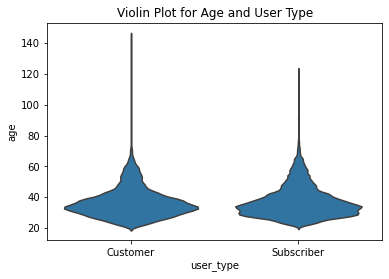

In [60]:
# violin plot for age and user type
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_clean, x='user_type', y='age', color=base_color, inner=None);

plt.title('Violin Plot for Age and User Type');

### Observation

The subscribers seem to be younger in age with dual peaks but this is not clear cut. The customer'long tail indicates the presence of outliers

### Question 16

What is the relationship between age and distance


### Visualization

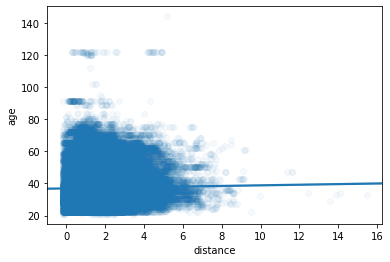

In [61]:
# applying opaqueness to the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data =bike_clean, x = 'distance', y = 'age', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/25});


### Observation

The distance covered by the riders tend to decrease as age increases as we see more points at the lower left quandrant of the plot




### Question 17

What is the relationship between age and duration


### Visualization

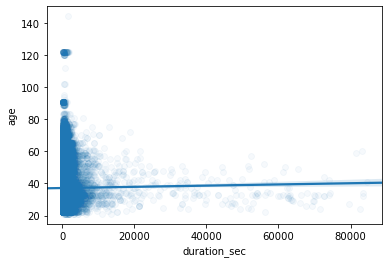

In [62]:
# applying opaqueness to the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data =bike_clean, x = 'duration_sec', y = 'age', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/25});

### Observation 

From the plot we can infer that younger riders spent more time in their riders comapared with aged riders. Duration reduces with increase in age

In [63]:
bike_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,start_day,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,38,0.544709,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,50,2.704545,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,33,0.260739,Thursday,Friday


### Question 18

What is the relationship between gender and bike sharing


### Visualization


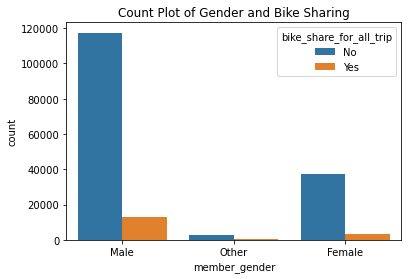

In [64]:
# count of the gender that shared their ride
sb.countplot(data = bike_clean, x = 'member_gender', hue = 'bike_share_for_all_trip')


plt.title('Count Plot of Gender and Bike Sharing');

### Observation

More riders did not share their riders and also males booked more rides in the period under review

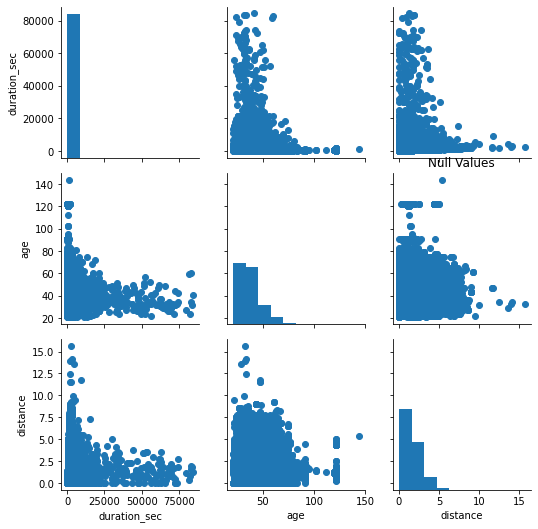

In [65]:
# seaborn pairplot
g = sb.PairGrid(data =bike_clean, vars = ['duration_sec', 'age', 'distance'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

plt.xlabel('Columns')
plt.ylabel('Number of Rows with Null Value')
plt.title('Null Values');

<AxesSubplot:>

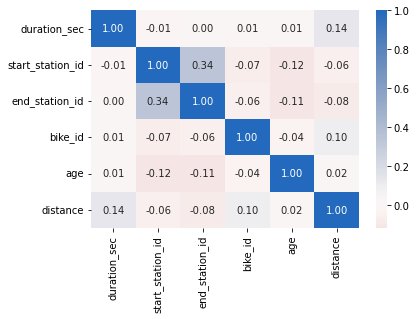

In [66]:
# heat map of the dataset with correlation
sb.heatmap(bike_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The features of interest are duration_sec, user_type, member_gender, bike_share_for_all_trip, age and distance. Overall there isn't strong positive or negative relationship between the features of interest. However there was weak negative correlation between age and distance, age and duration and Age and ride sharing. Common with more distance and more duration are riders of younger age.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Aside from the feture of interest other features did not quite show meaningful relationship

## Multivariate Exploration

### Question 19

what is the relationship between the three  variables gender, duration and bike sharing


### Visualization

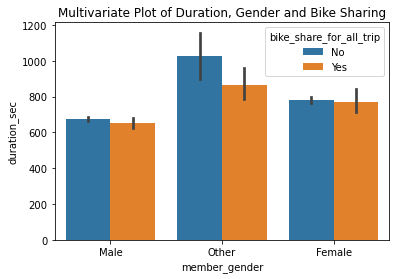

In [67]:
# Multivariate plot of gender, duration and bike sharing
sb.barplot(x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip', data = bike_clean)
 
# Show the plot
#plt.show()

plt.title('Multivariate Plot of Duration, Gender and Bike Sharing');

### Observation
Others spent more time in both sharing and non-shared rides in the period under review.

### Question 20
What is the relationship between the three  variables gender, duration and bike sharing?

### Visualization

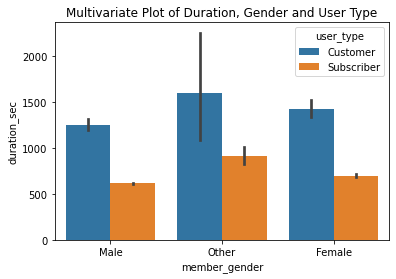

In [68]:
# Multivariate plot of gender, duration and user type
sb.barplot(x = 'member_gender', y = 'duration_sec', hue = 'user_type', data = bike_clean)

plt.title('Multivariate Plot of Duration, Gender and User Type');

### Observation
Others comprising subscribers and customer spent more time compared with Males and females

### Question 21

What is the number of rider that ended same day or spilled over to another day

In [69]:
# rides that started and ended at the same station
len(bike_clean[bike_clean.start_station_id == bike_clean.end_station_id])


3458

In [70]:
# rides that started and ended at the same station
bike_clean[bike_clean.start_station_id == bike_clean.end_station_id]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,start_day,end_day
19,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180.0,Telegraph Ave at 23rd St,180.0,Telegraph Ave at 23rd St,5629,Customer,Male,No,44,0.0,Thursday,Thursday
27,408,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78.0,Folsom St at 9th St,78.0,Folsom St at 9th St,5410,Subscriber,Male,No,40,0.0,Thursday,Thursday
34,471,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133.0,Valencia St at 22nd St,133.0,Valencia St at 22nd St,5559,Subscriber,Male,No,30,0.0,Thursday,Thursday
55,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11.0,Davis St at Jackson St,11.0,Davis St at Jackson St,1846,Subscriber,Male,No,27,0.0,Thursday,Thursday
56,3140,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11.0,Davis St at Jackson St,11.0,Davis St at Jackson St,3040,Subscriber,Female,No,39,0.0,Thursday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183317,1476,2019-02-01 02:45:04.744,2019-02-01 03:09:41.184,345.0,Hubbell St at 16th St,345.0,Hubbell St at 16th St,5224,Subscriber,Male,No,55,0.0,Friday,Friday
183318,877,2019-02-01 02:53:15.995,2019-02-01 03:07:53.058,385.0,Woolsey St at Sacramento St,385.0,Woolsey St at Sacramento St,4913,Subscriber,Male,No,35,0.0,Friday,Friday
183326,5713,2019-02-01 01:02:55.168,2019-02-01 02:38:09.002,31.0,Raymond Kimbell Playground,31.0,Raymond Kimbell Playground,5366,Subscriber,Male,No,50,0.0,Friday,Friday
183350,874,2019-02-01 01:41:43.414,2019-02-01 01:56:17.552,253.0,Haste St at College Ave,253.0,Haste St at College Ave,3232,Subscriber,Male,Yes,27,0.0,Friday,Friday


In [71]:
# rides that started and ended at different station
len(bike_clean[bike_clean.start_station_id != bike_clean.end_station_id])

171493

In [72]:
# rides that started and ended at different station
bike_clean[bike_clean.start_station_id != bike_clean.end_station_id]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,start_day,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,38,0.544709,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,50,2.704545,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,33,0.260739,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,48,2.409301,Thursday,Friday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,63,3.332203,Thursday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,Male,No,26,1.464766,Friday,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,Male,No,38,1.402716,Friday,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,Male,Yes,32,0.379066,Friday,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,Male,No,34,0.747282,Friday,Friday


In [73]:
# generating a subset from the dataset for further analysis
bike_clean_subset = bike_clean.sample(frac=0.02, random_state=2).reset_index(drop=True)
bike_clean_subset

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance,start_day,end_day
0,156,2019-02-27 18:37:00.140,2019-02-27 18:39:36.193,30.0,San Francisco Caltrain (Townsend St at 4th St),50.0,2nd St at Townsend St,2440,Subscriber,Male,No,34,0.619201,Wednesday,Wednesday
1,163,2019-02-21 08:20:42.516,2019-02-21 08:23:26.018,385.0,Woolsey St at Sacramento St,241.0,Ashby BART Station,4536,Subscriber,Male,No,49,0.730272,Thursday,Thursday
2,393,2019-02-11 20:24:21.912,2019-02-11 20:30:55.521,240.0,Haste St at Telegraph Ave,249.0,Russell St at College Ave,1007,Subscriber,Male,No,25,0.972639,Monday,Monday
3,246,2019-02-22 15:17:34.042,2019-02-22 15:21:40.385,350.0,8th St at Brannan St,67.0,San Francisco Caltrain Station 2 (Townsend St...,6144,Subscriber,Male,No,41,1.071735,Friday,Friday
4,413,2019-02-01 16:39:39.979,2019-02-01 16:46:33.251,60.0,8th St at Ringold St,114.0,Rhode Island St at 17th St,2147,Subscriber,Male,No,39,1.269839,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,356,2019-02-11 09:26:20.663,2019-02-11 09:32:16.825,25.0,Howard St at 2nd St,44.0,Civic Center/UN Plaza BART Station (Market St ...,5539,Subscriber,Male,No,36,1.449377,Monday,Monday
3495,1216,2019-02-08 10:32:03.898,2019-02-08 10:52:20.107,75.0,Market St at Franklin St,23.0,The Embarcadero at Steuart St,5271,Subscriber,Female,No,30,3.302586,Friday,Friday
3496,498,2019-02-01 09:25:49.648,2019-02-01 09:34:08.006,23.0,The Embarcadero at Steuart St,364.0,China Basin St at 3rd St,5537,Customer,Male,No,28,2.166362,Friday,Friday
3497,77,2019-02-01 06:59:02.948,2019-02-01 07:00:20.230,182.0,19th Street BART Station,337.0,Webster St at 19th St,4596,Subscriber,Male,No,58,0.269894,Friday,Friday


### Observation
3458 rides ended at the same start location while 171494 rider ended at a diiferent location from the start point 


### Question 22
What is the relationship between duration age and distance


### Visualization

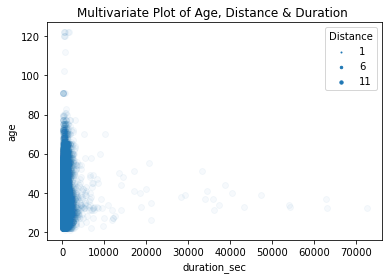

In [74]:
#continuous or numeric data we can use size as marker using 's'


bike_clean_subset = bike_clean.sample(frac=0.1, random_state=1).reset_index(drop=True)

sb.regplot(data = bike_clean_subset, x= 'duration_sec', y = 'age', x_jitter = 0.04, fit_reg = False, scatter_kws={'alpha':1/25})

sizes = [1, 6, 11]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s, color = base_color))
    plt.legend(legend_obj, sizes, title= 'Distance')
    plt.title('Multivariate Plot of Age, Distance & Duration ')
    
    

### Observation

We can see that young adults are doing greater duration and distance. Both duration and distance reduces as age increases

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate plot shows that younger riders are ultilizes the bike sharing service more 

### Were there any interesting or surprising interactions between features?

> Others in gender seem to share more rides in the multivariate bar plot


## Conclusions
> In conclusion we can see youths and young adults embarked on longer trips as well as duration. Majority of them are male and they are subscribers


References: Google, geeksforgeeks, stackoverflow, kaggle and codegrepper